# Assuntos

- trees classification
- rules classification
- rudimentary rules
- naive bayes
- data missing and number attributes
- information gain calc


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tree classification

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(273.92727272727274, 587.0880000000001, 'X[1] <= 0.5\ngini = 0.645\nsamples = 20\nvalue = [9, 5, 6]'),
 Text(121.74545454545455, 456.624, 'X[0] <= 0.5\ngini = 0.611\nsamples = 6\nvalue = [2, 1, 3]'),
 Text(60.872727272727275, 326.1600000000001, 'gini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(182.61818181818182, 326.1600000000001, 'gini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(426.1090909090909, 456.624, 'X[1] <= 1.5\ngini = 0.622\nsamples = 14\nvalue = [7, 4, 3]'),
 Text(304.3636363636364, 326.1600000000001, 'X[0] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2, 0]'),
 Text(243.4909090909091, 195.69600000000003, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(182.61818181818182, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(304.3636363636364, 65.23200000000008, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(365.23636363636365, 195.69600000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(547.854545454545

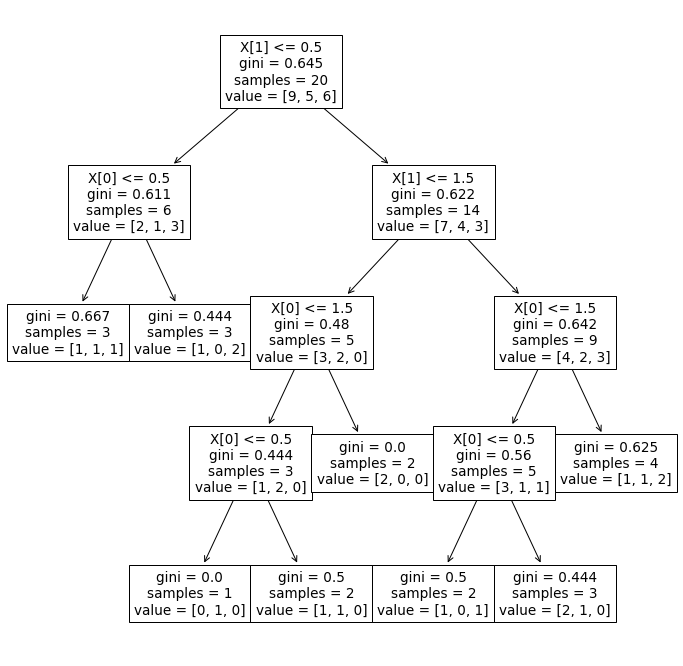

In [2]:
# fazendo array aleatorio de tamanho n
n = 20
X = np.random.randint(3,size=(n,2))
y = np.random.randint(3,size=n)

# tree classification
plt.figure(figsize=(12,12))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

# Método 1R (rudimentary rules)

## Base de dados

In [3]:
data = {'Age': [36,42,23,52,43,44,66	,35,	52,	35,	24,	18,	45	],
        'Experience': [10, 12, 4, 4,	21, 14,	3,	14, 13,	5,	3,	3,	9,	],
        'Rank':[9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
        'Nationality':['UK', 'USA', 'N', 'USA', 'USA', 'UK', 'N',	'UK', 'N', 'N', 'USA', 'UK', 'UK'],
        'Go':['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES']
        }

df = pd.DataFrame(data)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


- Como a classe Age é quantitativa, podemos dividir até uma certa quantidade de valores para saber qual a melhor classificação em %

In [4]:
n = len(df) # tamanho

# pegando a classe majoritaria da coluna Age
rule_age1 = df[(df['Age'] < df['Age'].mean()) & (df['Go'] == 'YES')] # df com idade < media classificadas com yes
rule_age2 = df[(df['Age'] < df['Age'].mean()) & (df['Go'] == 'NO')] # df com idade < media classificadas com no

rule_age3 = df[(df['Age'] > df['Age'].mean()) & (df['Go'] == 'YES')] # df com idade > media classificadas com yes
rule_age4 = df[(df['Age'] > df['Age'].mean()) & (df['Go'] == 'NO')] # df com idade > media classificadas com no

rule_age_size1 = len(rule_age1)
rule_age_size2 = len(rule_age2)
rule_age_size3 = len(rule_age3)
rule_age_size4 = len(rule_age4)

In [5]:
print(f"Entre a classe menor que a media: \n\tYES: {rule_age_size1}, NO: {rule_age_size2}\n")
print(f"Entre a classe maior que a media: \n\tYES: {rule_age_size3}, NO: {rule_age_size4}")

Entre a classe menor que a media: 
	YES: 3, NO: 3

Entre a classe maior que a media: 
	YES: 4, NO: 3


In [6]:
print(f"A classe majoritaria da coluna Age é: {rule_age_size1} (YES) e {rule_age_size2} (YES)\n")
print(f"A acurácia é: {rule_age_size1 + rule_age_size2}/{n} = {(rule_age_size1 + rule_age_size2)/n}")

A classe majoritaria da coluna Age é: 3 (YES) e 3 (YES)

A acurácia é: 6/13 = 0.46153846153846156


In [7]:
# agora fazendo a mesma coisa só que dividindo a idade até 43 anos:
rule_age1 = df[(df['Age'] <= 43) & (df['Go'] == 'YES')] # df com idade < media classificadas com yes
rule_age2 = df[(df['Age'] < 43) & (df['Go'] == 'NO')] # df com idade < media classificadas com no

rule_age3 = df[(df['Age'] >= 43) & (df['Go'] == 'YES')] # df com idade > media classificadas com yes
rule_age4 = df[(df['Age'] > 43) & (df['Go'] == 'NO')] # df com idade > media classificadas com no

rule_age_size1 = len(rule_age1)
rule_age_size2 = len(rule_age2)
rule_age_size3 = len(rule_age3)
rule_age_size4 = len(rule_age4)

In [8]:
print(f"Entre a classe menor que a media: \n\tYES: {rule_age_size1}, NO: {rule_age_size2}\n")
print(f"Entre a classe maior que a media: \n\tYES: {rule_age_size3}, NO: {rule_age_size4}")

Entre a classe menor que a media: 
	YES: 4, NO: 4

Entre a classe maior que a media: 
	YES: 4, NO: 2


In [9]:
print(f"A classe majoritaria da coluna Age é: {rule_age_size1} (YES) e {rule_age_size2} (YES)\n")
print(f"A acurácia é: {rule_age_size1 + rule_age_size2}/{n} = {(rule_age_size1 + rule_age_size2)/n}")

A classe majoritaria da coluna Age é: 4 (YES) e 4 (YES)

A acurácia é: 8/13 = 0.6153846153846154


In [10]:
# pegando a classe majoritaria da coluna Experience
rule_Experience1 = df[(df['Experience'] <= 12) & (df['Go'] == 'YES')] # df com idade < media classificadas com yes
rule_Experience2 = df[(df['Experience'] <= 12) & (df['Go'] == 'NO')] # df com idade < media classificadas com no

rule_Experience3 = df[(df['Experience'] > 12) & (df['Go'] == 'YES')] # df com idade > media classificadas com yes
rule_Experience4 = df[(df['Experience'] > 12) & (df['Go'] == 'NO')] # df com idade > media classificadas com no

rule_Experience_size1 = len(rule_Experience1)
rule_Experience_size2 = len(rule_Experience2)
rule_Experience_size3 = len(rule_Experience3)
rule_Experience_size4 = len(rule_Experience4)

In [11]:
print(f"Entre a classe menor que 12: \n\tYES: {rule_Experience_size1}, NO: {rule_Experience_size2}\n")
print(f"Entre a classe maior que 12: \n\tYES: {rule_Experience_size3}, NO: {rule_Experience_size4}")

Entre a classe menor que 12: 
	YES: 4, NO: 5

Entre a classe maior que 12: 
	YES: 3, NO: 1


In [12]:
print(f"A classe majoritaria da coluna Experience é: {rule_Experience_size1} (YES) e {rule_Experience_size2} (NO)\n")
print(f"A acurácia é: {rule_Experience_size1 + rule_Experience_size2}/{n} = {(rule_Experience_size1 + rule_Experience_size2)/n}")

A classe majoritaria da coluna Experience é: 4 (YES) e 5 (NO)

A acurácia é: 9/13 = 0.6923076923076923


# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

### Data processing

In [14]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [15]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

In [16]:
X

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [17]:
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

### Prediction

In [18]:
# digamos que queremos encontrar a classificação do seguinte:
# age = 30
# xp = 10
# rank = 3
# nacionality = usa (1)
# go = ?

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X, y)


GaussianNB()

In [19]:
pred = naive_bayes_classifier.predict([[30, 10, 3, 1]])
print(pred)
# 0 = NO
# 1 = YES

[0]


# Dataset de tempo (Do livro) CALCULO DE GANHO DE INFORMAÇÃO

In [78]:
dataset = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': ['false', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'true'],
    'classification': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
    
}

In [79]:
dataf = pd.DataFrame(dataset)
dataf

,outlook,temperature,humidity,windy,classification
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [9]:
import math

In [56]:
def entropy(array):
    soma = sum(array)
    sum_entropy = 0
    for a in array:
        if a != 0:
            sum_entropy += -(a/soma)*math.log2(a/soma)
    return sum_entropy
    

In [63]:
def calculating_information(array):
    
    information = []
    soma = 0
    for a in array:
        soma += sum(a)

    for value in array:          
        soma1 = sum(value)
        info = entropy(value)

        information.append((soma1/soma)*info)
        
    return sum(information)


In [64]:
calculating_information([[2,3],[4,0], [3,2]])

0.6935361388961918

In [86]:
def calculating_gain_information(atributte, data):
    unique_values = data[atributte].unique()

    yes_sum, no_sum = data['classification'].value_counts()


    info1 = calculating_information([[yes_sum, no_sum]])

    array = [[]]
    for value in unique_values:
        data_value = data[data[atributte] == value]
        yes_values = data_value[data_value['classification'] == 'yes'].shape[0]
        no_values = data_value[data_value['classification'] == 'no'].shape[0]
        
        array.append([yes_values, no_values])

    return (info1 - calculating_information(array))

In [87]:
outlook_info = calculating_gain_information('outlook', dataf)

In [88]:
outlook_info = calculating_gain_information('outlook', dataf)
temperature_info = calculating_gain_information('temperature', dataf)
humidity_info = calculating_gain_information('humidity', dataf)
windy_info = calculating_gain_information('windy', dataf)

print(f"Outlook: {outlook_info}\nTemperature: {temperature_info}\nHumidity: {humidity_info}\nWindy: {windy_info}")

Outlook: 0.24674981977443933
Temperature: 0.02922256565895487
Humidity: 0.15183550136234159
Windy: 0.04812703040826949


# Método PRISM

In [17]:
# Dataset do livro lentes de contato
data = {'Age': ['young',
'young',
'young',
'young',
'young',
'young',
'young',
'young',
'pre-presbyopic',
'pre-presbyopic',
'pre-presbyopic',
'pre-presbyopic',
'pre-presbyopic',
'pre-presbyopic',
'pre-presbyopic',
'pre-presbyopic',
'presbyopic',
'presbyopic',
'presbyopic',
'presbyopic',
'presbyopic',
'presbyopic',
'presbyopic',
'presbyopic'],
        
        'Spectacle Prescription': ['myope',
                                    'myope',
                                    'myope',
                                    'myope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'myope',
                                    'myope',
                                    'myope',
                                    'myope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'myope',
                                    'myope',
                                    'myope',
                                    'myope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'hypermetrope',
                                    'hypermetrope',],
        
        'Astigmatism': ['no',
                        'no',
                        'yes',
                        'yes',
                        'no',
                        'no',
                        'yes',
                        'yes',
                        'no',
                        'no',
                        'yes',
                        'yes',
                        'no',
                        'no',
                        'yes',
                        'yes',
                        'no',
                        'no',
                        'yes',
                        'yes',
                        'no',
                        'no',
                        'yes',
                        'yes',],
        
        'Tear Production Rate': ['reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',
                                'reduced',
                                'normal',],
        
        'Recommended Lenses': ['none',
                                'soft',
                                'none',
                                'hard',
                                'none',
                                'soft',
                                'none',
                                'hard',
                                'none',
                                'soft',
                                'none',
                                'hard',
                                'none',
                                'soft',
                                'none',
                                'none',
                                'none',
                                'none',
                                'none',
                                'hard',
                                'none',
                                'soft',
                                'none',
                                'none',]
        
        }

In [15]:
import numpy as np
import pandas as pd
from dfply import *

def compute_probabilities(df, target):
    prob_table = pd.DataFrame()
    feature_matrix = df.drop(target, axis=1)
    feature_variables = feature_matrix.columns.values
    target_variable = target

    for feature_variable in feature_variables:
        for unique_value in feature_matrix[feature_variable].unique():
            prob_table = prob_table.append((df >> mask(X[feature_variable] == unique_value)
                                               >> group_by(X[target_variable])
                                               >> summarize(count = n(X[feature_variable]))
                                               >> ungroup()
                                               >> rename(target = X[target_variable])
                                               >> mutate(probability = X['count']/X['count'].sum())
                                               >> mutate(variable = feature_variable)
                                               >> mutate(value = unique_value)
                                               >> select(['target', 'variable', 'value', 'probability'])), ignore_index=True)
    return prob_table

def return_best_rule(prob_table):
    best_rule = prob_table >> mask(X['probability'] == X['probability'].max())
    return best_rule.iloc[0, :]

def update_table(prob_table, rule):
    for idx in prob_table.index:
        if prob_table.iloc[idx,:].equals(rule):
            new_table = prob_table.drop(idx).reset_index(drop=True)
    return new_table

def PRISM(df, target):
    rules = []
    prob_table = compute_probabilities(df, target)
    while prob_table.empty == False:
        best_rule = return_best_rule(prob_table)
        rules.append(best_rule['variable']+' == '+best_rule['value'])
        prob_table = update_table(prob_table, best_rule)
    return rules



In [18]:
df = pd.DataFrame(data)

#Chamando a função do algoritmo PRISM no DataFrame e indicando o nome da coluna da variável alvo (classes).
rules = PRISM(df, 'Recommended Lenses')

#Imprimindo a lista de regras associativas, que por padrão já estão em ordem crescente de importância.
for r in rules: print(r)

Tear Production Rate == reduced
Age == presbyopic
Spectacle Prescription == hypermetrope
Astigmatism == yes
Age == pre-presbyopic
Spectacle Prescription == myope
Astigmatism == no
Age == young
Astigmatism == no
Tear Production Rate == normal
Astigmatism == yes
Tear Production Rate == normal
Age == young
Age == young
Age == pre-presbyopic
Spectacle Prescription == myope
Spectacle Prescription == hypermetrope
Tear Production Rate == normal
Spectacle Prescription == myope
Age == pre-presbyopic
Age == presbyopic
Age == presbyopic
Spectacle Prescription == hypermetrope
